In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
from PIL import Image

In [3]:
import h5py

# Open the file
file = h5py.File(r"C:\Users\unarv\Downloads\test_catvnoncat.h5", 'r')


# List all top-level groups and datasets
list(file.keys())

['list_classes', 'test_set_x', 'test_set_y']

In [4]:
with h5py.File(r"C:\Users\unarv\Downloads\train_catvnoncat.h5", 'r') as train_data:
    train_set_x_org = np.array(train_data['train_set_x'][:])
    train_set_y = np.array(train_data['train_set_y'][:])
with h5py.File(r"C:\Users\unarv\Downloads\test_catvnoncat.h5", 'r') as test_data:
    test_set_x_org = np.array(test_data['test_set_x'][:])
    test_set_y = np.array(test_data['test_set_y'][:])
if 'list_classes' in train_data:
    classes = np.array(train_data['list_classes'][:])
else:
    classes = np.array(['b.cat'])

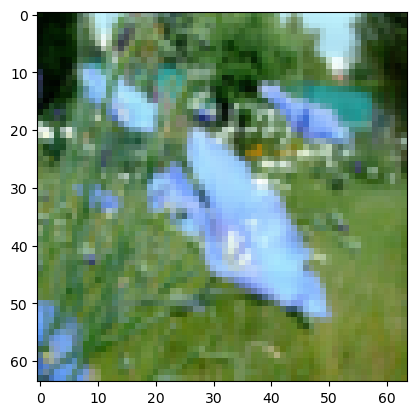

In [5]:
plt.imshow(train_set_x_org[20])

In [6]:
train_set_x_flatten = train_set_x_org.reshape(train_set_x_org.shape[0],-1).T
test_set_x_flatten = test_set_x_org.reshape(test_set_x_org.shape[0],-1).T

In [7]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [8]:
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s

In [9]:
def initialize_with_zeros(dim):
    w = np.zeros((dim),1)
    b=0.0

In [10]:
def propogate(w, b, X, Y):
    m = X.shape[1]
    A = 1/(1+np.exp(-(np.dot((w.T),X)+b)))
    cost = -1/m*(np.sum((Y*np.log(A))+((1-Y)*np.log(1-A))))
    dw = 1/m*(np.dot(X,(A-Y).T))
    db = 1/m*(np.sum(A-Y))
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [11]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w=copy.deepcopy(w)
    b=copy.deepcopy(b)
    costs=[]
    for i in range (num_iterations):
        grads, cost = propogate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i%1000 ==0:
            costs.append(cost)
            print("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [12]:
def predict(w, b, X):
     m = X.shape[1]
     Y_prediction = np.zeros((1, m))
     w = w.reshape(X.shape[0], 1)
     A = 1/(1+np.exp(-(np.dot((w.T),X)+b)))
     A = np.clip(A, 1e-10, 1-1e-10)
     for i in range(A.shape[1]):
         if A[0,i]>0.5:
            Y_prediction[0,i] = 1
         else:
            Y_prediction[0,i] = 0
     return Y_prediction

In [13]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w = np.zeros((X_train.shape[0], 1))
    b = 0.0
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [23]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=30000, learning_rate=0.0001, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.591339
Cost after iteration 2000: 0.555836
Cost after iteration 3000: 0.529011
Cost after iteration 4000: 0.506913
Cost after iteration 5000: 0.487909
Cost after iteration 6000: 0.471135
Cost after iteration 7000: 0.456071
Cost after iteration 8000: 0.442374
Cost after iteration 9000: 0.429805
Cost after iteration 10000: 0.418186
Cost after iteration 11000: 0.407383
Cost after iteration 12000: 0.397290
Cost after iteration 13000: 0.387821
Cost after iteration 14000: 0.378907
Cost after iteration 15000: 0.370489
Cost after iteration 16000: 0.362518
Cost after iteration 17000: 0.354952
Cost after iteration 18000: 0.347754
Cost after iteration 19000: 0.340893
Cost after iteration 20000: 0.334343
Cost after iteration 21000: 0.328077
Cost after iteration 22000: 0.322076
Cost after iteration 23000: 0.316319
Cost after iteration 24000: 0.310790
Cost after iteration 25000: 0.305474
Cost after iteration 26000: 0.300357
Cost after ite

predicted as cat


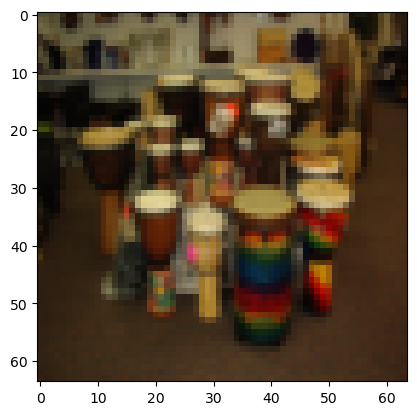

In [42]:
index=5
plt.imshow(train_set_x_org[index])
pred=logistic_regression_model["Y_prediction_test"][0][index-1]
if pred==0.0:
    print('predicted as not a cat')
else:
    print('predicted as cat')